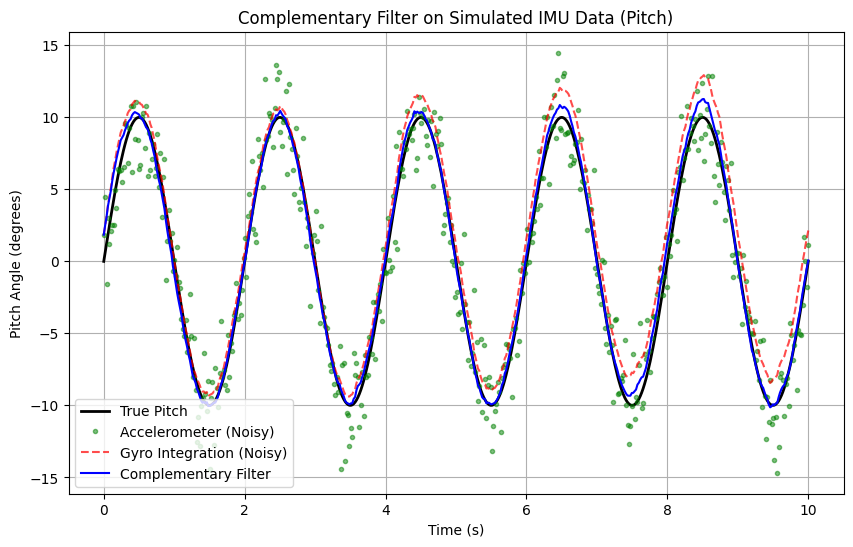

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Membuat data simulasi
np.random.seed(42)
time = np.linspace(0, 10, 500)  # 10 detik, 500 sampel
dt = time[1] - time[0]         # Delta t

# Asumsikan ada gerakan pitch sinusoidal + noise
true_pitch = 10 * np.sin(2 * np.pi * 0.5 * time)  # amplitudo 10 derajat, freq 0.5 Hz

# Gyroscope rate (derajat/detik) = turunan dari pitch
true_gyro_rate = np.gradient(true_pitch, dt)

# Tambahkan noise
gyro_rate_noisy = true_gyro_rate + np.random.normal(0, 5, size=len(time))  # noise ±5 deg/s
acc_pitch_noisy = true_pitch + np.random.normal(0, 2, size=len(time))      # noise ±2 deg

# 2. Menghitung sudut dari gyroscope dengan integrasi
gyro_angle = np.zeros_like(time)
gyro_angle[0] = acc_pitch_noisy[0]  # inisialisasi sudut awal sama dengan accelerometer

for i in range(1, len(time)):
    gyro_angle[i] = gyro_angle[i-1] + gyro_rate_noisy[i] * dt

# 3. Menggabungkan data menggunakan Complementary Filter
alpha = 0.98  # bobot untuk gyro (umumnya 0.95 - 0.99)
comp_angle = np.zeros_like(time)
comp_angle[0] = acc_pitch_noisy[0]

for i in range(1, len(time)):
    # Integrasi gyro
    gyro_integration = comp_angle[i-1] + gyro_rate_noisy[i] * dt
    # Sudut dari accelerometer
    acc_angle = acc_pitch_noisy[i]
    # Rumus complementary filter
    comp_angle[i] = alpha * gyro_integration + (1 - alpha) * acc_angle

# 4. Visualisasi hasil
plt.figure(figsize=(10, 6))

plt.plot(time, true_pitch, 'k-', label='True Pitch', linewidth=2)
plt.plot(time, acc_pitch_noisy, 'g.', alpha=0.5, label='Accelerometer (Noisy)')
plt.plot(time, gyro_angle, 'r--', alpha=0.7, label='Gyro Integration (Noisy)')
plt.plot(time, comp_angle, 'b-', label='Complementary Filter')

plt.title("Complementary Filter on Simulated IMU Data (Pitch)")
plt.xlabel("Time (s)")
plt.ylabel("Pitch Angle (degrees)")
plt.legend()
plt.grid(True)
plt.show()


### **Penjelasan Kode:**
1. **Data Simulasi:**
   - `true_pitch`: Sudut pitch sebenarnya (fungsi sinus).  
   - `true_gyro_rate`: Turunan dari `true_pitch` (derajat/detik).  
   - Ditambahkan *noise* berbeda pada `gyro_rate_noisy` dan `acc_pitch_noisy`.

2. **Integrasi Gyroscope:**
   - Menghitung sudut dari gyro dengan menjumlahkan laju rotasi $\omega_{\text{gyro}}$ dikalikan $\Delta t$.  
   - Rentan mengalami *drift* karena kesalahan integrasi akan menumpuk.

3. **Complementary Filter:**
   - Mengombinasikan sudut hasil integrasi gyro dengan sudut dari accelerometer.  
   - Parameter $\alpha$ ditetapkan 0.98 (gyroscope 98% dan accelerometer 2%).

4. **Plot Hasil:**
   - **True Pitch (hitam)**: Referensi.  
   - **Accelerometer (hijau)**: Data langsung dari perhitungan sensor + noise.  
   - **Gyro Integration (merah)**: Sudut dari hasil integrasi laju rotasi + noise (bisa terlihat *drift*).  
   - **Complementary Filter (biru)**: Hasil gabungan yang lebih stabil dan akurat. 